In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# load raw data
firewall_04062012 = pd.read_csv('Firewall/Firewall-04062012.csv',low_memory=False)
firewall_04072012 = pd.read_csv('Firewall/Firewall-04072012.csv',low_memory=False)

# Data Wrangling

In [9]:
# Find unique Source port values in each dataset
unique_in_data1 = set(firewall_04062012['Source port']).difference(firewall_04072012['Source port'])
unique_in_data2 = set(firewall_04072012['Source port']).difference(firewall_04062012['Source port'])
common_ports = set(firewall_04062012['Source port']).intersection(firewall_04072012['Source port'])

# Create the 'unique source port' column for each dataset
firewall_04062012['unique source port'] = firewall_04062012['Source port'].apply(lambda x: 'unique in log1' if x in unique_in_data1 else 'not unique')
firewall_04072012['unique source port'] = firewall_04072012['Source port'].apply(lambda x: 'unique in log2' if x in unique_in_data2 else 'not unique')

# Concatenate the two datasets
combined_data = pd.concat([firewall_04062012, firewall_04072012], ignore_index=True)

In [10]:
combined_data.head()

,Date/time,Syslog priority,Operation,Message code,Protocol,Source IP,Destination IP,Source hostname,Destination hostname,Source port,Destination port,Destination service,Direction,Connections built,Connections torn down,unique source port
0,05/Apr/2012 17:51:26,Info,Teardown,ASA-6-302016,UDP,172.23.0.1,172.23.0.2,(empty),(empty),514,514,syslog,(empty),0,1,unique in log1
1,05/Apr/2012 17:51:26,Info,Built,ASA-6-302015,UDP,172.23.0.1,172.23.0.2,(empty),(empty),514,514,syslog,outbound,1,0,unique in log1
2,05/Apr/2012 17:53:06,Info,Built,ASA-6-302015,UDP,172.23.0.10,198.32.64.12,(empty),(empty),64048,53,domain,outbound,1,0,not unique
3,05/Apr/2012 17:53:10,Info,Built,ASA-6-302015,UDP,172.23.0.10,202.12.27.33,(empty),(empty),64048,53,domain,outbound,1,0,not unique
4,05/Apr/2012 17:53:14,Info,Built,ASA-6-302015,UDP,172.23.0.10,128.9.0.107,(empty),(empty),64048,53,domain,outbound,1,0,not unique


In [11]:
# check if all data types are correct
combined_data.dtypes

Date/time                object
Syslog priority          object
Operation                object
Message code             object
Protocol                 object
Source IP                object
Destination IP           object
Source hostname          object
Destination hostname     object
Source port              object
Destination port         object
Destination service      object
Direction                object
Connections built         int64
Connections torn down     int64
unique source port       object
dtype: object

In [12]:
# convert date into datetime
combined_data['Date/time'] = pd.to_datetime(combined_data['Date/time'])

In [13]:
#drop empty columns
combined_data = combined_data.drop(['Source hostname', 'Destination hostname'], axis="columns")

In [14]:
combined_data.head()

,Date/time,Syslog priority,Operation,Message code,Protocol,Source IP,Destination IP,Source port,Destination port,Destination service,Direction,Connections built,Connections torn down,unique source port
0,2012-04-05 17:51:26,Info,Teardown,ASA-6-302016,UDP,172.23.0.1,172.23.0.2,514,514,syslog,(empty),0,1,unique in log1
1,2012-04-05 17:51:26,Info,Built,ASA-6-302015,UDP,172.23.0.1,172.23.0.2,514,514,syslog,outbound,1,0,unique in log1
2,2012-04-05 17:53:06,Info,Built,ASA-6-302015,UDP,172.23.0.10,198.32.64.12,64048,53,domain,outbound,1,0,not unique
3,2012-04-05 17:53:10,Info,Built,ASA-6-302015,UDP,172.23.0.10,202.12.27.33,64048,53,domain,outbound,1,0,not unique
4,2012-04-05 17:53:14,Info,Built,ASA-6-302015,UDP,172.23.0.10,128.9.0.107,64048,53,domain,outbound,1,0,not unique


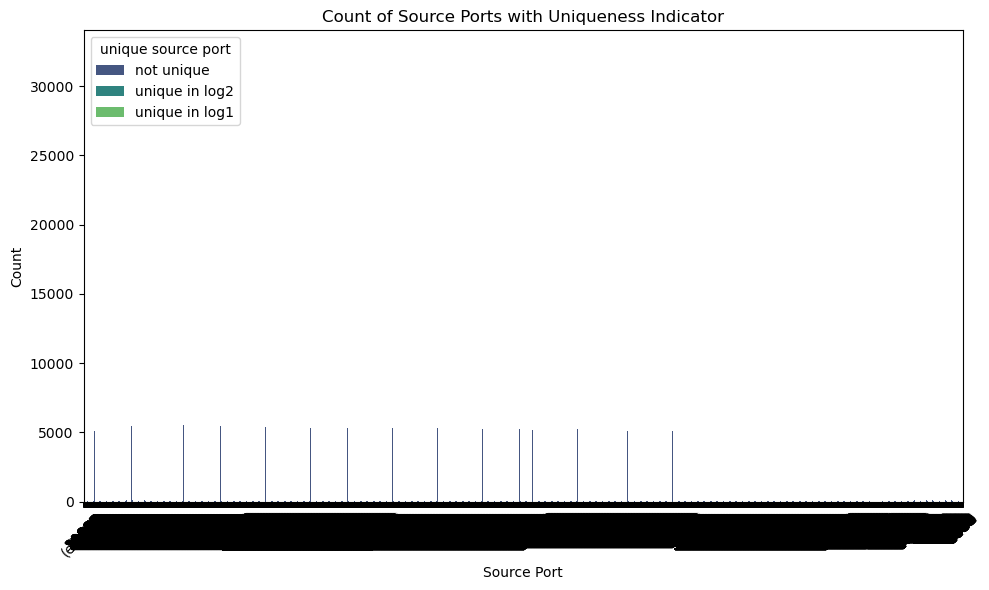

In [15]:
# not working
# Count occurrences of each 'Source port' value, grouping by 'unique source port' status
source_port_counts = combined_data.groupby(['Source port', 'unique source port']).size().reset_index(name='count_source_port')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=source_port_counts, x='Source port', y='count_source_port', hue='unique source port', palette='viridis')

# Customizing the plot
plt.title("Count of Source Ports with Uniqueness Indicator")
plt.xlabel("Source Port")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [16]:
# Filter out 'unique in log1' and 'unique in log2' rows
filtered_data = combined_data[combined_data['unique source port'].isin(['unique in log1', 'unique in log2'])]

# Count occurrences of each 'Source port' value, grouped by 'unique source port'
source_port_counts = filtered_data.groupby(['Source port', 'unique source port']).size().reset_index(name='count_source_port')


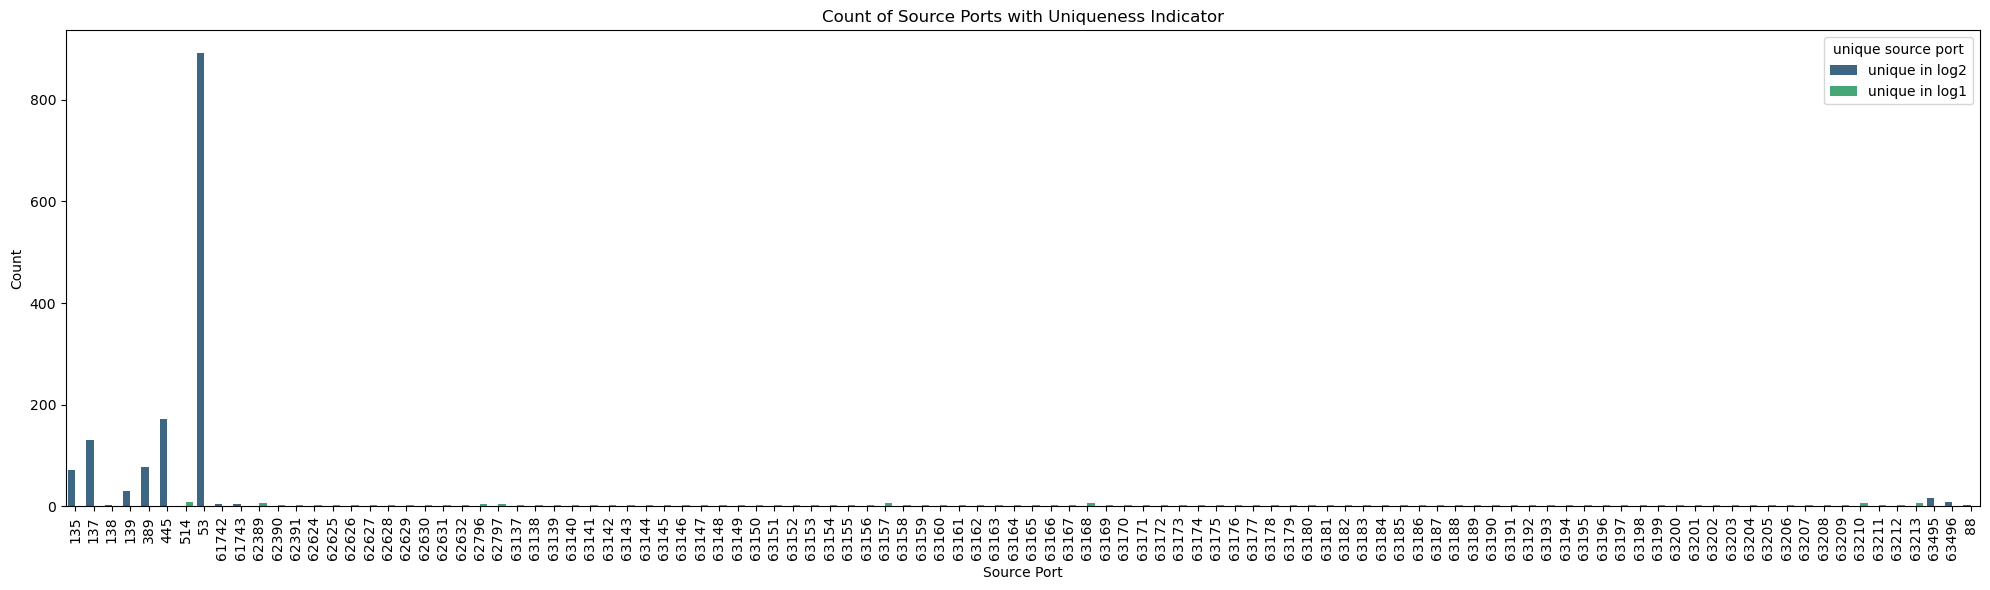

In [20]:
# not working
# Plotting
plt.figure(figsize=(20, 6))
sns.barplot(data=source_port_counts, x='Source port', y='count_source_port', hue='unique source port', palette='viridis')

# Customizing the plot
plt.title("Count of Source Ports with Uniqueness Indicator")
plt.xlabel("Source Port")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Count occurrences of each 'Source port' value, grouping by 'unique source port' status
source_port_counts_0406 = firewall_04062012.groupby(['Source port', 'unique source port']).size().reset_index(name='count_source_port')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=source_port_counts_0406, x='Source port', y='count_source_port', hue='unique source port', palette='viridis')

# Customizing the plot
plt.title("Count of Source Ports with Uniqueness Indicator")
plt.xlabel("Source Port")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Count occurrences of each 'Source port' value, grouping by 'unique source port' status
source_port_counts_0407 = firewall_04072012.groupby(['Source port', 'unique source port']).size().reset_index(name='count_source_port')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=source_port_counts_0407, x='Source port', y='count_source_port', hue='unique source port', palette='viridis')

# Customizing the plot
plt.title("Count of Source Ports with Uniqueness Indicator")
plt.xlabel("Source Port")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [22]:
# Filter out 'unique in log1' and 'unique in log2' rows
filtered_data_try = combined_data[combined_data['Source port'].isin(['6667', '53'])]
filtered_data_try

,Date/time,Syslog priority,Operation,Message code,Protocol,Source IP,Destination IP,Source port,Destination port,Destination service,Direction,Connections built,Connections torn down,unique source port
1202285,2012-04-05 20:25:35,Critical,Deny,ASA-2-106001,TCP,10.32.5.56,10.32.0.1,6667,1688,1688_tcp,inbound,0,0,not unique
1202492,2012-04-05 20:25:35,Critical,Deny,ASA-2-106001,TCP,10.32.5.51,10.32.0.1,6667,25751,25751_tcp,inbound,0,0,not unique
1202828,2012-04-05 20:25:36,Critical,Deny,ASA-2-106001,TCP,10.32.5.51,10.32.0.1,6667,47506,47506_tcp,inbound,0,0,not unique
1202863,2012-04-05 20:25:36,Critical,Deny,ASA-2-106001,TCP,10.32.5.59,10.32.0.1,6667,7915,7915_tcp,inbound,0,0,not unique
1202914,2012-04-05 20:25:36,Critical,Deny,ASA-2-106001,TCP,10.32.5.52,10.32.0.1,6667,18156,18156_tcp,inbound,0,0,not unique
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23707216,2012-04-07 08:59:45,Critical,Deny,ASA-2-106001,TCP,10.32.5.52,10.32.0.1,6667,57685,57685_tcp,inbound,0,0,not unique
23707244,2012-04-07 08:59:45,Critical,Deny,ASA-2-106001,TCP,10.32.5.51,10.32.0.1,6667,33855,33855_tcp,inbound,0,0,not unique
23709644,2012-04-07 08:59:48,Critical,Deny,ASA-2-106001,TCP,10.32.5.55,10.32.0.1,6667,37430,37430_tcp,inbound,0,0,not unique
23709757,2012-04-07 08:59:48,Critical,Deny,ASA-2-106001,TCP,10.32.5.54,10.32.0.1,6667,17372,17372_tcp,inbound,0,0,not unique
